<a href="https://colab.research.google.com/github/rishnaveen/Projects/blob/main/naveen_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.) Importing the Required Libraries:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
sns.set()
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2.) Importing the dataset in pandas dataframe:**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**About the dataset features**


* PassengerId - Unique Id of each passenger.
* Survived - '0' for not survived & '1' for survived
* Pclass - Passenger class: '1' for 1st class, '2' for 2nd class & '3' for 3rd class
* Name - Passenger name
* Sex - Passenger gender.
* Age - Passenger age
* SibSp - No. of siblings or spouses aborded.
* Parch - No. of parents or children aborded.
* Ticket - Passenger ticket number
* Fare - Passenger ticket fare
* Cabin - Passenger cabin number
* Embarked - Encoded name of city passenger embarked

After data importing and reading the data means the prediction will be in 0 or 1, Yes or No etc. which is very fitting in this Titanic scenario where the result we want to find out is alive or not.

My understanding on a logistics regression is that it is a classification model and it produces results in a binary format (discrete/categorical).


In [ ]:
data.shape

(891, 12)

The titanic train data consists of 891 rows and 12 columns.

## **3.) Cleaning the data & Visualizing the features relation:**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Visualiation**

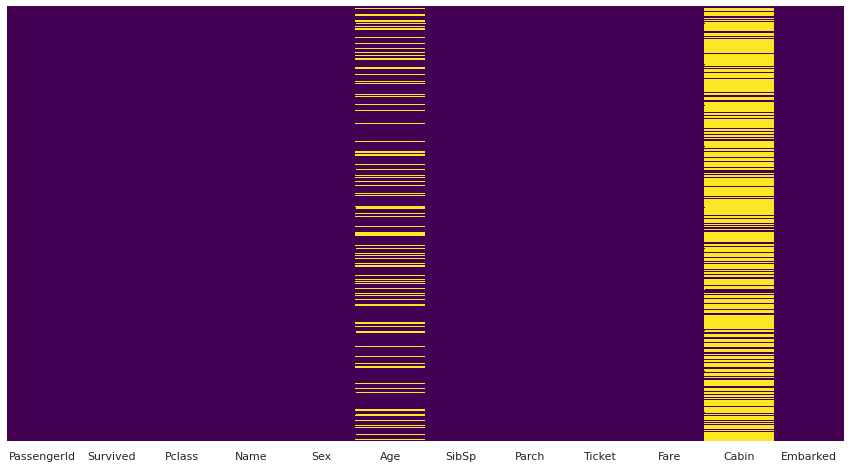

In [ ]:
f= plt.figure(figsize=(15,8))
sns.heatmap(data.isnull(),yticklabels = False , cbar = False , cmap = 'viridis')
plt.show()

Here, 
according to heatmap we have seen **Cabin** feature has more null value so that for better data we are dropping **'Cabin'** feature.

In [ ]:
data.drop("Cabin", axis=1, inplace=True)

In [ ]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

We have Replaced thie missing values in "Age" feature with mean value.

Here, we are finding the mode value of "Emmbarked" feature for fill the null value in "Emmbarked" feature.

In [ ]:
data['Embarked'].mode()

0    S
dtype: object

We are Replacing thie missing values in "Embarked" feature with mode value **"S"**:

In [ ]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace = True)

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

So now it is confirmed that the dataset is clean without any null value.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


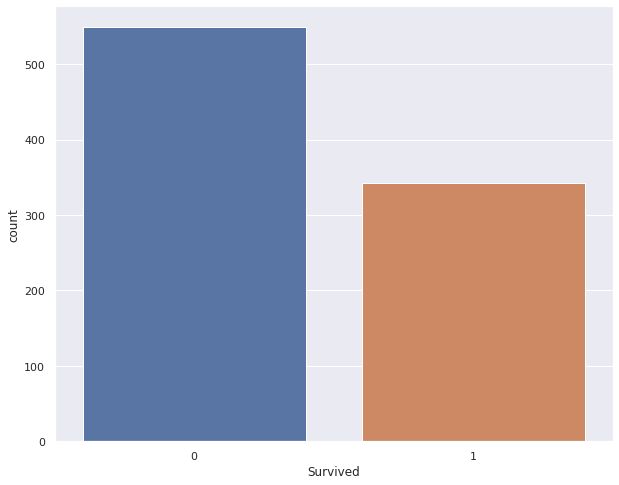

In [ ]:
f= plt.figure(figsize=(10,8))
sns.countplot('Survived', data = data)
plt.show()

Using seaborn library by the **countplot** we have ploted value counts of **"Survived"** feature for the better understanding of value.

But by this ploting we are not able to know exact value of "survived" feature, So that below we can use **value_counts**  method to calculate total value. 

In [ ]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

As we show above '0' for not survived & '1' for survived. So by the checking value_counts function we have seen **549** passangers are not Survived & **342** passangers are Survived after the incident.
 

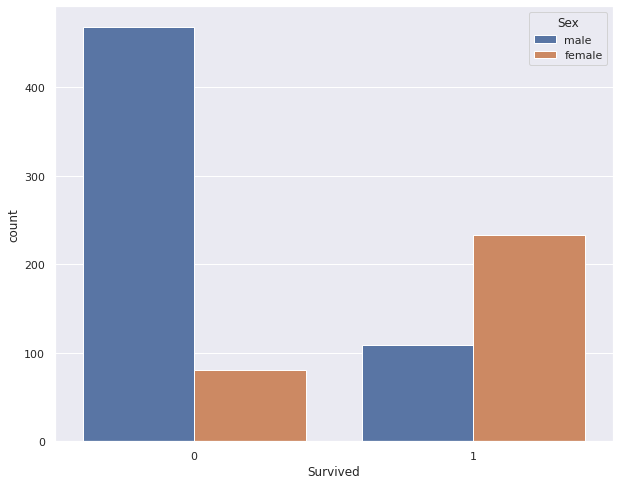

In [ ]:
f= plt.figure(figsize=(10,8))
sns.countplot(x="Survived", hue="Sex", data=data)
plt.show()

We can see females have a higher survival rate than males in this scenario.

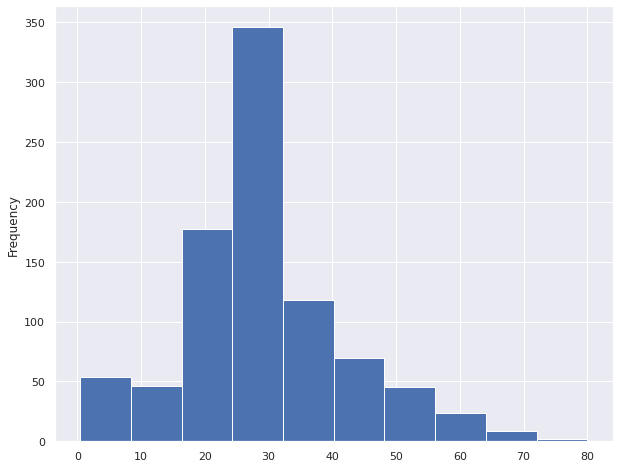

In [ ]:
f = plt.figure(figsize=(10,8))
data["Age"].plot.hist()
plt.show()

Here, we can see average population of passengers on the titanic are young to middle age group.

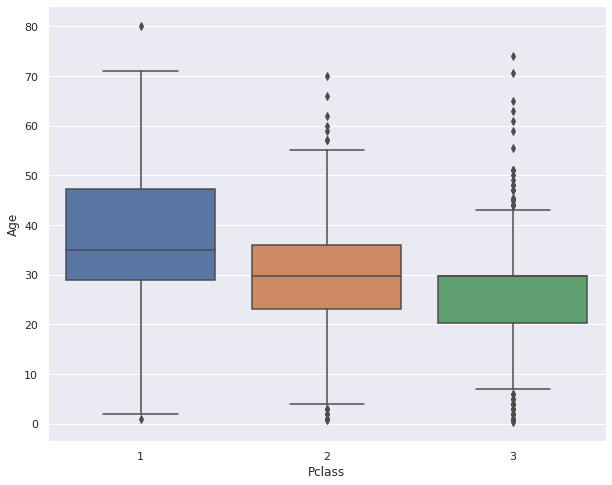

In [ ]:
f = plt.figure(figsize = (10,8))
sns.boxplot(x="Pclass", y="Age", data=data)
plt.show()

By the **boxplot** we can see that older population of passengers are more likely to be in Passenger Class 1 & Class 2 than Class 3.

In [ ]:
correlation = data.corr()

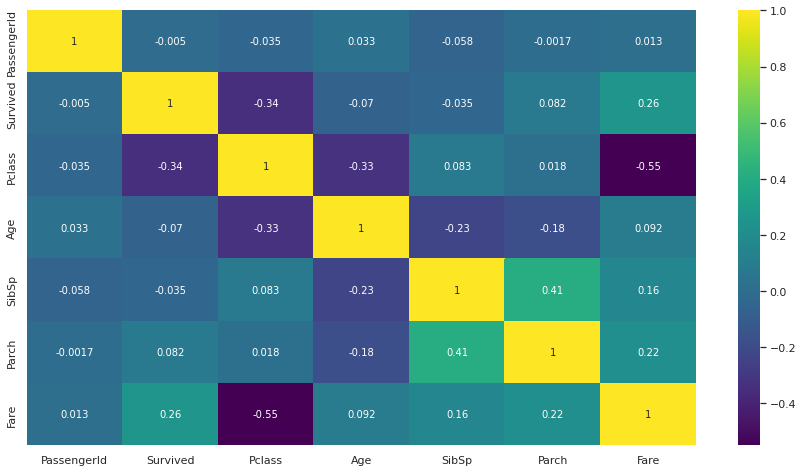

In [ ]:
plt.figure(figsize=(15,8))
sns_plot=sns.heatmap(data=correlation, annot=True, cmap="viridis")
plt.show()

In [ ]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [ ]:
data.Sex.unique()

array(['male', 'female'], dtype=object)

In the **"Sex"** feature we have 2 unique values only. So we can convert **'Sex'** feature values into '0' for female & '1' for male.

In [ ]:
data['Sex'] = data['Sex'].map({'female': 0,'male':1})

In [ ]:
data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
data['Embarked'] = data['Embarked'].map({'S':0,'C':1,'Q':2})

Let's select usefull features for the better machine learning model prediction.

In [ ]:
x = data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = data['Survived']

In [ ]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## **4.) Spliting the data into training data & test data**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


##**5.) Training the Model**

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
prediction = model.predict(x_test)
print(prediction)

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [ ]:
accuracy_score(y_test,prediction)

0.8044692737430168